In [18]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Loading mixed data (GTZAN dataset + YouTube data)

In [19]:
data = pd.read_csv('data_mix.csv')
data.head()

,MFCC1_Mean,MFCC2_Mean,MFCC3_Mean,MFCC4_Mean,MFCC5_Mean,MFCC6_Mean,MFCC7_Mean,MFCC8_Mean,MFCC9_Mean,MFCC10_Mean,...,MFCC12_Var,MFCC13_Var,MFCC14_Var,MFCC15_Var,MFCC16_Var,MFCC17_Var,MFCC18_Var,MFCC19_Var,MFCC20_Var,Label
0,-202.407974,166.767883,-29.063051,35.231968,-7.021881,26.260551,-12.185494,15.810824,-4.190476,-6.121345,...,35.144840,63.236923,47.332485,86.354355,38.870907,94.355904,18.192657,58.465191,43.517445,blues
1,-194.815598,170.630585,-37.334534,36.500557,-6.618162,18.045141,-6.102125,15.924576,-3.994879,-5.965096,...,41.252335,39.127922,50.740669,57.180687,62.119591,62.943115,69.166725,123.617004,72.833069,blues
2,-207.168427,177.416641,-19.825985,34.417259,-13.723843,22.251123,-8.538532,12.130745,-0.924732,-4.370468,...,47.653198,37.141811,32.786049,61.379265,31.179749,35.971004,32.982254,32.468094,22.021683,blues
3,-173.847214,138.374161,-31.265633,50.847828,-24.704271,17.972462,-1.393162,-4.374794,-7.386628,15.041191,...,74.775719,46.816250,87.237602,64.124466,99.918686,77.069939,49.496777,146.983185,36.357033,blues
4,-178.541718,151.246490,-37.812202,47.722809,-7.711584,18.562996,-5.909832,7.504122,-7.322074,11.085575,...,34.002884,35.557098,87.806839,78.256432,99.967041,64.290489,68.170197,41.308800,55.424549,blues


In [20]:
classes = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [21]:
data = data.sample(frac=1, random_state = 101).reset_index(drop=True)

In [22]:
x_data = data[data.columns[:-1]]
y_data = pd.Categorical(data['Label']).codes

In [23]:
len_x = x_data.shape[0]
x_train  = x_data[:math.floor(len_x * 0.85)]
x_val  = x_data[math.floor(len_x * 0.85) :]

len_y = y_data.shape[0]
y_train  = y_data[:math.floor(len_y * 0.85)]
y_val  = y_data[math.floor(len_y * 0.85) :]

In [24]:
scaler = StandardScaler()

scaled_tr = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_tr, columns=x_train.columns)

scaled_val = scaler.fit_transform(x_val)
x_val = pd.DataFrame(scaled_val, columns=x_val.columns)

## Neural Network Architecture

In [25]:
model = tf.keras.Sequential()

model.add(keras.layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation= 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               20992     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [26]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(x = x_train, y = y_train, validation_data= (x_val,y_val), epochs=100, batch_size = 64)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 2.1975 - accuracy: 0.1782 - val_loss: 1.7731 - val_accuracy: 0.3969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 1.7929 - accuracy: 0.3691 - val_loss: 1.5490 - val_accuracy: 0.4738
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 1.6234 - accuracy: 0.4345 - val_loss: 1.4326 - val_accuracy: 0.5213
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 1.5322 - accuracy: 0.4650 - val_loss: 1.3651 - val_accuracy: 0.5467
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 1.4664 - accuracy: 0.5014 - val_loss: 1.3017 - val_accuracy: 0.5747
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 1.4050 - accuracy: 0.5166 - val_loss: 1.2565 - val_accuracy: 0.5844
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 1.3615 - accuracy: 0.5302 - val_loss: 1.2227 - val_accuracy: 0.6036

Epoch 58/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7659 - accuracy: 0.7363 - val_loss: 0.8127 - val_accuracy: 0.7196
Epoch 59/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7469 - accuracy: 0.7486 - val_loss: 0.8083 - val_accuracy: 0.7253
Epoch 60/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7680 - accuracy: 0.7365 - val_loss: 0.8051 - val_accuracy: 0.7262
Epoch 61/100
200/200 [==============================] - 1s 6ms/step - loss: 0.7365 - accuracy: 0.7504 - val_loss: 0.8017 - val_accuracy: 0.7240
Epoch 62/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7540 - accuracy: 0.7491 - val_loss: 0.7995 - val_accuracy: 0.7271
Epoch 63/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7251 - accuracy: 0.7557 - val_loss: 0.7944 - val_accuracy: 0.7267
Epoch 64/100
200/200 [==============================] - 1s 5ms/step - loss: 0.7386 - accuracy: 0.7452 - val_loss: 0.7953 - val_accuracy:

# Accuracy & Loss

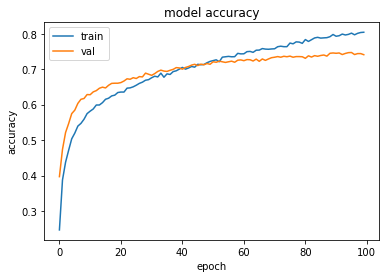

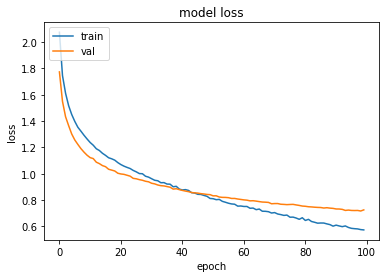

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Test on YouTube data

In [28]:
data_test = pd.read_csv('data_test.csv')
data_test.head()

,MFCC1_Mean,MFCC2_Mean,MFCC3_Mean,MFCC4_Mean,MFCC5_Mean,MFCC6_Mean,MFCC7_Mean,MFCC8_Mean,MFCC9_Mean,MFCC10_Mean,...,MFCC12_Var,MFCC13_Var,MFCC14_Var,MFCC15_Var,MFCC16_Var,MFCC17_Var,MFCC18_Var,MFCC19_Var,MFCC20_Var,Label
0,-249.010376,149.310394,-38.809299,42.263432,-14.468389,10.295317,-13.667592,4.414966,-4.662990,0.519707,...,122.881081,72.274254,66.570541,259.968506,53.388855,69.137527,52.009602,167.365768,55.598461,hiphop
1,-279.474091,167.203583,-20.340523,25.866331,-15.994143,0.329006,-22.783136,-1.330112,-11.841547,2.925979,...,186.408676,110.577431,178.660934,108.807304,61.083157,99.472855,71.585411,124.691971,158.015259,hiphop
2,-296.589569,145.014938,-8.389028,32.571354,-3.660239,20.281359,-22.275860,-11.310889,-22.031324,-7.625155,...,294.384308,259.512238,209.804428,81.502647,135.450653,67.957977,68.078758,237.000793,172.157974,hiphop
3,-240.589905,161.670792,-22.104473,38.933300,-15.202853,16.041809,-19.434389,0.025945,-13.720518,-4.024367,...,76.631096,91.791725,118.611588,73.517639,123.737152,55.229832,44.574848,99.319275,107.875664,hiphop
4,-141.305054,122.189499,-54.743061,65.195763,-40.119255,14.402914,-40.423481,3.981862,-8.399135,0.515828,...,143.140717,90.704193,92.015656,54.689579,74.343674,59.269360,64.264503,74.729507,127.474457,hiphop


In [29]:
data_test.Label = [classes[l] for l in data_test.Label]

In [30]:
x_test = data_test[data_test.columns[:-1]]
y_test = data_test['Label']

scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

In [31]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 2.3794 - accuracy: 0.3671


[2.3794496059417725, 0.3670634925365448]

# Confusion matrix

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


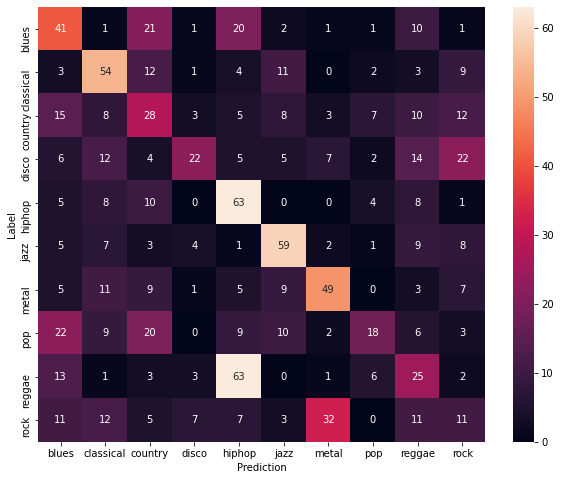

In [32]:
confusion_mtx = tf.math.confusion_matrix(y_test, model.predict_classes(x_test)) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=classes.keys(), yticklabels=classes.keys(), 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Saving model

In [33]:
model.save('models/NN_Mixed')

INFO:tensorflow:Assets written to: models/NN_Mixed\assets


In [34]:
print('done')

done
